In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression

df = pd.read_csv("/content/drive/MyDrive/dsbdl/pract/ Iris.csv")
df = df.drop(columns=["Id"])
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
df["Species"] = lab_enc.fit_transform(df["Species"])

'x = np.array(df[column], dtype=float)\nx = pd.DataFrame(x ,columns = ["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"] )\nx\ny = np.array(df["Species"], dtype=int).reshape(-1,1)\ny = pd.DataFrame(y,columns = ["Species"]) \ny'

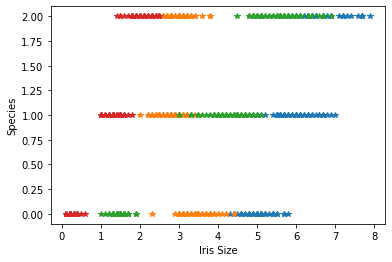

In [ ]:
def plot_data(x, y):
	plt.xlabel('Iris Size')
	plt.ylabel('Species')
	plt.plot(x, y,'*')
	plt.show()
x = df.drop(columns='Species')
y = df["Species"]
plot_data(x,y)

In [ ]:

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)

X_train.shape,Y_train.shape,X_test.shape,Y_test.shape


((112, 4), (112,), (38, 4), (38,))

In [ ]:
from sklearn.preprocessing import StandardScaler

logistic = LogisticRegression()
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
logistic.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
print("Accuracy: ", logistic.score(X_test, Y_test))

Accuracy:  0.9736842105263158


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

predicted = logistic.predict(X_test) 
matrix = confusion_matrix(Y_test,predicted, labels=[1,0])
matrix

array([[15,  0],
       [ 0, 13]])

In [ ]:
report = classification_report(Y_test,predicted)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

